In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(picante)
library(car)
library(dunn.test)
library(ggpubr)
library(viridis)

#### Read in data

In [3]:
batrun_t = readRDS("/gpfs/data/gilbert-lab/Lutz/Epomophorus/RDSfiles/bat_t.rds")

#### Estimate Unweighted Unifrac betadiversity

In [4]:
bat.dist.unif = distance(batrun_t, method = "unifrac", type = "samples")
bat.dist.unif.log = ordinate(batrun_t, method = "PCoA", distance = "unifrac")
bat.dist.unif.evals = bat.dist.unif.log$values$Eigenvalues

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGTGTAGGCGGCCTGTTAAGCGTGTTGTGAAATGTAGATGCTCAACATCTGAACTGCAGCGCGAACTGGCTGGCTTGAGTACACGCAACGTGGGCGGAATTCATGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTATGTCCCGAGCGTTATCCGGATTTATTGGGCGTAAAGCGAGCGCAGACGGTTGATTAAGTCTGATGTGAAAGCCCGGAGCTCAACTCCGGAATGGCATTGGAAACTGGTTAACTTGAGTGTTGTAGAGGTAAGTGGAACTCCATG -- in the phylogenetic tree in the data you provided.”

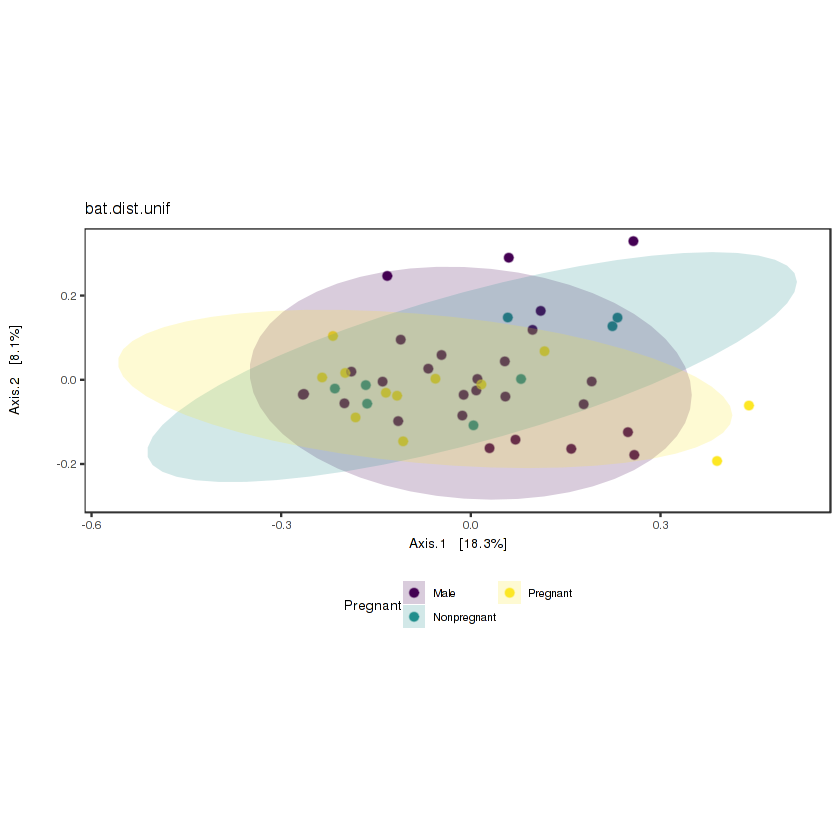

In [7]:
p = plot_ordination(batrun_t, bat.dist.unif.log, color = "Pregnant") + 
    ggtitle("bat.dist.unif") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Pregnant), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.unif.evals[2] / bat.dist.unif.evals[1]))

p = p + guides(colour = guide_legend(title = "Pregnant", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.unif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

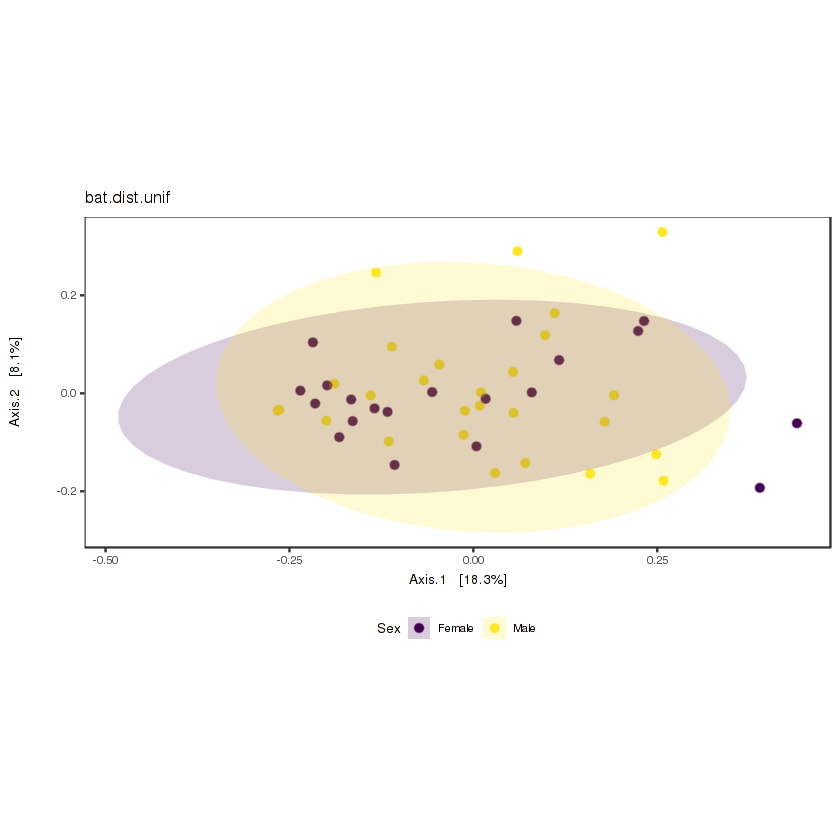

In [8]:
p = plot_ordination(batrun_t, bat.dist.unif.log, color = "Sex") + 
    ggtitle("bat.dist.unif") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.unif.evals[2] / bat.dist.unif.evals[1]))

p = p + guides(colour = guide_legend(title = "Sex", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.unif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

#### PERMANOVA analysis of variance described by sex/pregnancy - unweighted unifrac

In [25]:
batrun.df = data.frame(sample_data(batrun_t))
adonis2(bat.dist.unif ~ Sex, nperm=999, data=batrun.df)
adonis2(bat.dist.unif ~ Pregnant, nperm=999, data=batrun.df)
adonis2(bat.dist.unif ~ Age, strata=Sex, nperm=999, data=batrun.df)

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.113121,0.01545035,0.7061766,0.897
Residual,45,7.208461,0.98454965,NA,NA
Total,46,7.321582,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Pregnant,2,0.2177718,0.02974382,0.6744241,0.978
Residual,44,7.1038100,0.97025618,NA,NA
Total,46,7.3215819,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Age,1,0.1427121,0.01949198,0.8945761,0.61
Residual,45,7.1788697,0.98050802,NA,NA
Total,46,7.3215819,1.00000000,NA,NA


#### Estimate Weighted Unifrac betadiversity

In [9]:
bat.dist.wunif = distance(batrun_t, method = "wunifrac", type = "samples")
bat.dist.wunif.log = ordinate(batrun_t, method = "PCoA", distance = "wunifrac")
bat.dist.wunif.evals = bat.dist.wunif.log$values$Eigenvalues

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTCTTGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCAAGGCTGGAGTGCGGCAGAGGGGGATGGAATTCCGCG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGTGAGACAAGTCTGAAGTGAAAATCCGGGGCTTAACCCCGGAACTGCTTTGGAAACTGCCTGACTAGAGTACAGGAGAGGTAAGTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”

Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”

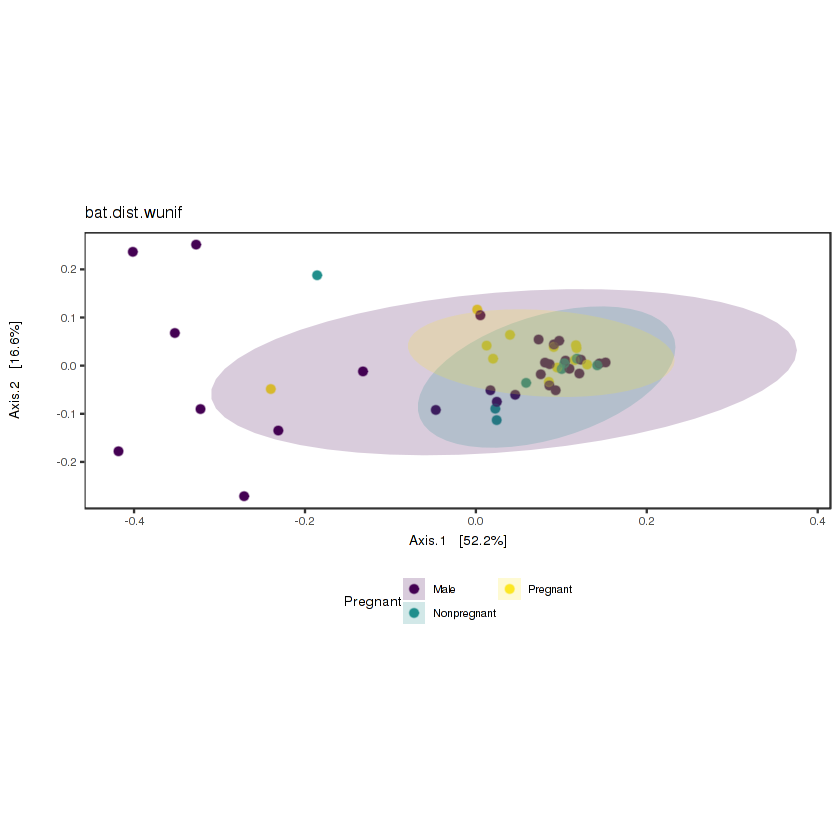

In [10]:
p = plot_ordination(batrun_t, bat.dist.wunif.log, color = "Pregnant") + 
    ggtitle("bat.dist.wunif") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Pregnant), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.wunif.evals[2] / bat.dist.wunif.evals[1]))

p = p + guides(colour = guide_legend(title = "Pregnant", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.wunif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

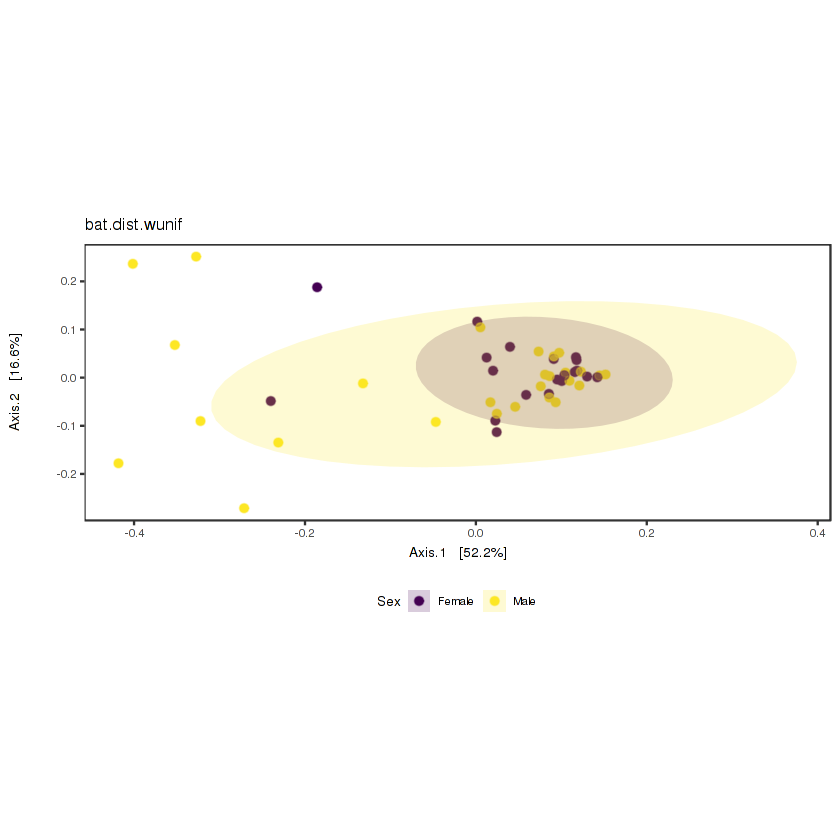

In [16]:
p = plot_ordination(batrun_t, bat.dist.wunif.log, color = "Sex") + 
    ggtitle("bat.dist.wunif") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.wunif.evals[2] / bat.dist.wunif.evals[1]))

p = p + guides(colour = guide_legend(title = "Sex", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.wunif.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

#### PERMANOVA analysis of variance described by sex/pregnancy - weighted unifrac

In [24]:
batrun.df = data.frame(sample_data(batrun_t))
adonis2(bat.dist.wunif ~ Sex, nperm=999, data=batrun.df)
adonis2(bat.dist.wunif ~ Pregnant, nperm=999, data=batrun.df)
adonis2(bat.dist.wunif ~ Age, strata=Sex, nperm=999, data=batrun.df)

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.1184033,0.03630792,1.695413,0.162
Residual,45,3.1426837,0.96369208,NA,NA
Total,46,3.2610870,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Pregnant,2,0.157530,0.04830599,1.116674,0.332
Residual,44,3.103557,0.95169401,NA,NA
Total,46,3.261087,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Age,1,0.01959148,0.006007654,0.2719784,0.907
Residual,45,3.24149552,0.993992346,NA,NA
Total,46,3.26108700,1.000000000,NA,NA


#### Estimate Bray-Curtis betadiversity

In [18]:
bat.dist.bc = distance(batrun_t, method = "bray", type = "samples")
bat.dist.bc.log = ordinate(batrun_t, method = "PCoA", distance = "bray")
bat.dist.bc.evals = bat.dist.bc.log$values$Eigenvalues

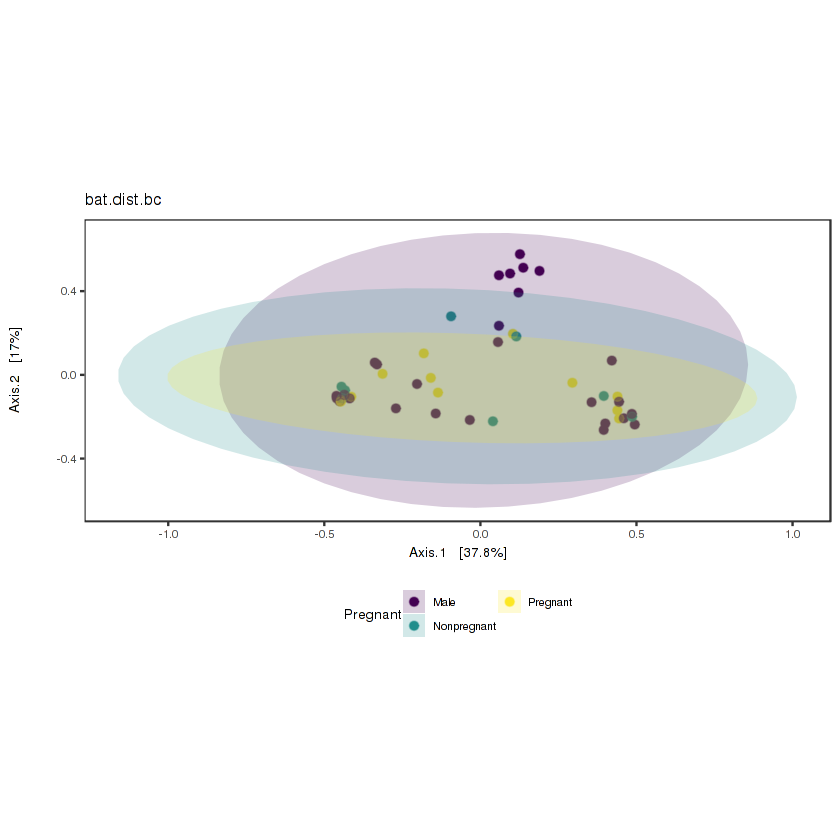

In [19]:
p = plot_ordination(batrun_t, bat.dist.bc.log, color = "Pregnant") + 
    ggtitle("bat.dist.bc") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Pregnant), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.bc.evals[2] / bat.dist.bc.evals[1]))

p = p + guides(colour = guide_legend(title = "Pregnant", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.bc.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

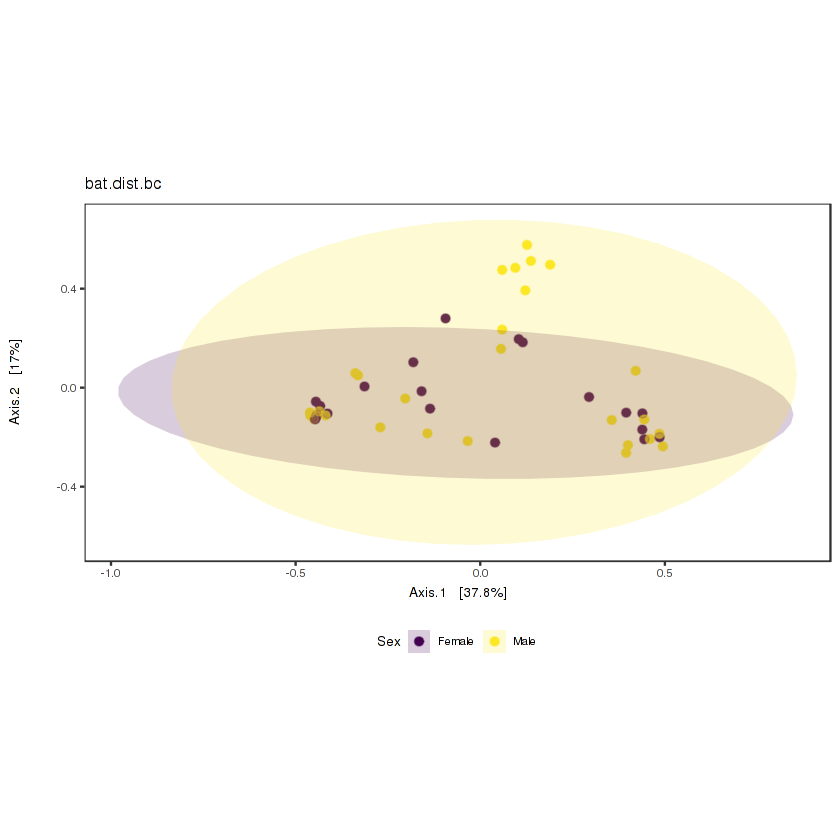

In [20]:
p = plot_ordination(batrun_t, bat.dist.bc.log, color = "Sex") + 
    ggtitle("bat.dist.bc") + 
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(bat.dist.bc.evals[2] / bat.dist.bc.evals[1]))

p = p + guides(colour = guide_legend(title = "Sex", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

#png('bat_sex_pregnancy.bc.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

In [23]:
batrun.df = data.frame(sample_data(batrun_t))
adonis2(bat.dist.bc ~ Sex, nperm=999, data=batrun.df)
adonis2(bat.dist.bc ~ Pregnant, nperm=999, data=batrun.df)
adonis2(bat.dist.bc ~ Age, strata=Sex, nperm=999, data=batrun.df)

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.2668453,0.01872476,0.8586929,0.473
Residual,45,13.9840897,0.98127524,NA,NA
Total,46,14.2509350,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Pregnant,2,0.4395858,0.0308461,0.700213,0.77
Residual,44,13.8113492,0.9691539,NA,NA
Total,46,14.2509350,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
Age,1,0.3013006,0.02114251,0.9719629,0.45
Residual,45,13.9496344,0.97885749,NA,NA
Total,46,14.2509350,1.00000000,NA,NA
